In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


df = pd.read_csv('mcdonalds.csv')


In [2]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [3]:

df.fillna(df.mean(), inplace=True)


C:\Users\pprat\AppData\Local\Temp\ipykernel_11452\2315066367.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


 Normalize numeric features for clustering

In [4]:

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(include=[np.number]))


Appying PCA

In [5]:
segmentation_data = df.iloc[:, :11]

# Converting the dataframe to a matrix
segmentation_matrix = segmentation_data.values

# Converting TRUE to 1, and FALSE to 0
binary_matrix = (segmentation_matrix == 'Yes').astype(int)

# Inspecting the average value of each transformed segmentation variable
average_values = np.round(binary_matrix.mean(axis=0), 2)
print(average_values)


[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [6]:
from sklearn.decomposition import PCA

# Applying PCA to the transformed data
pca = PCA()
transformed_data = pca.fit_transform(binary_matrix)
print("Transformed Data Shape:", transformed_data.shape)

# Finding standard deviation, proportion of variance, and cumulative proportion
std_dev = np.round(np.sqrt(pca.explained_variance_), 3)
variance_ratio = np.round(pca.explained_variance_ratio_, 3)
cumulative_variance = np.round(np.cumsum(variance_ratio), 3)

print("Standard Deviation:", std_dev)
print("Proportion of Variance:", variance_ratio)
print("Cumulative Proportion:", cumulative_variance)

Transformed Data Shape: (1453, 11)
Standard Deviation: [0.757 0.607 0.505 0.399 0.337 0.31  0.29  0.275 0.265 0.249 0.237]
Proportion of Variance: [0.299 0.193 0.133 0.083 0.059 0.05  0.044 0.04  0.037 0.032 0.029]
Cumulative Proportion: [0.299 0.492 0.625 0.708 0.767 0.817 0.861 0.901 0.938 0.97  0.999]


In [7]:
pca_df = pd.DataFrame(transformed_data, columns=[f'PC{i+1}' for i in range(transformed_data.shape[1])])

In [8]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


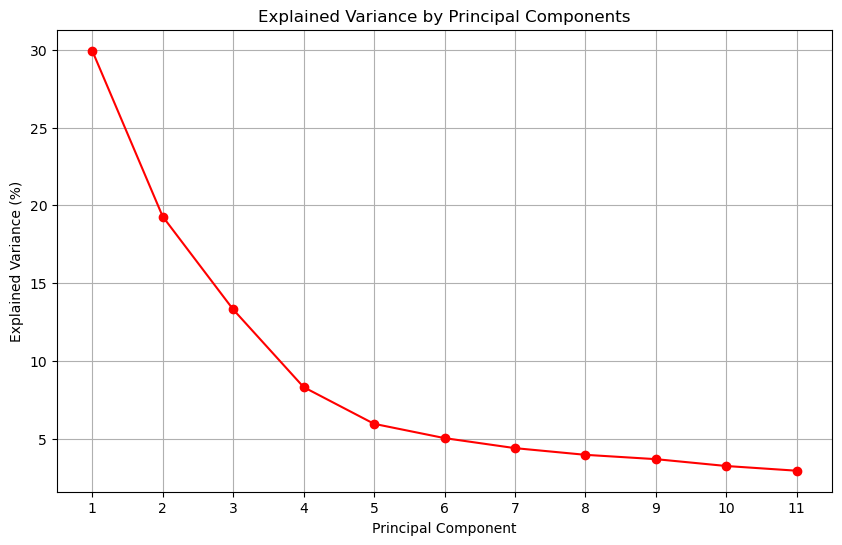

In [9]:
import matplotlib.pyplot as plt

# Getting the proportion of variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

# Plotting the explained variance for principal components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1),
         explained_variance * 100,
         marker='o',
         color='Red'  
)
plt.title("Explained Variance by Principal Components")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance (%)")
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()


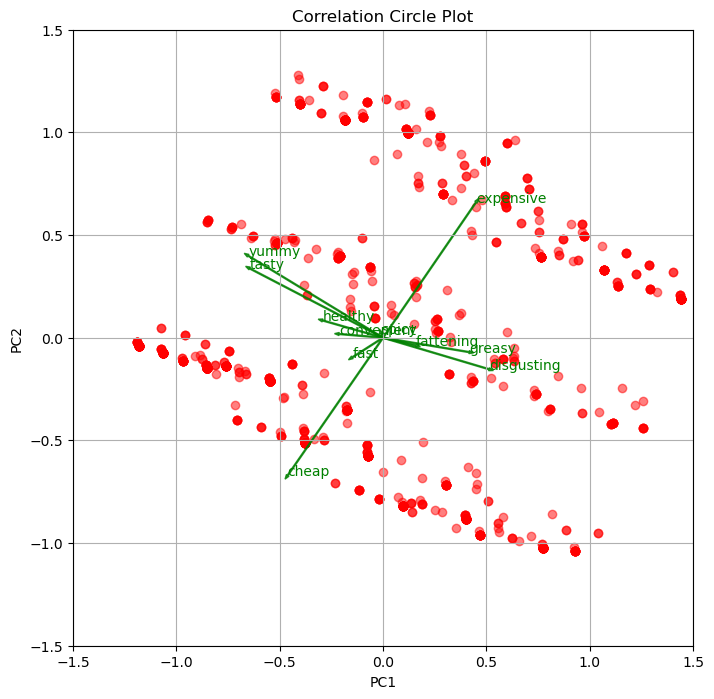

In [10]:
import matplotlib.pyplot as plt

# Get the explained variance ratios for the selected components
explained_variance_ratio = pca.explained_variance_ratio_

# Principal component vectors
loadings = pca.components_.T * np.sqrt(explained_variance_ratio)

# Set figsize and other layout parameters
plt.figure(figsize=(8, 8))

plt.title('Correlation Circle Plot')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Scatter plot
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], alpha=0.5, color='red')

mul = 2.5

# Adding variable labels to the plot
for i, feature in enumerate(df.columns[:11]):
    plt.annotate(feature, (mul * loadings[i, 0], mul * loadings[i, 1]), color='Green')
    plt.arrow(0, 0, mul * loadings[i, 0], mul * loadings[i, 1], color='Green', alpha=0.8, width=0.005)

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

plt.grid(True)
plt.show()


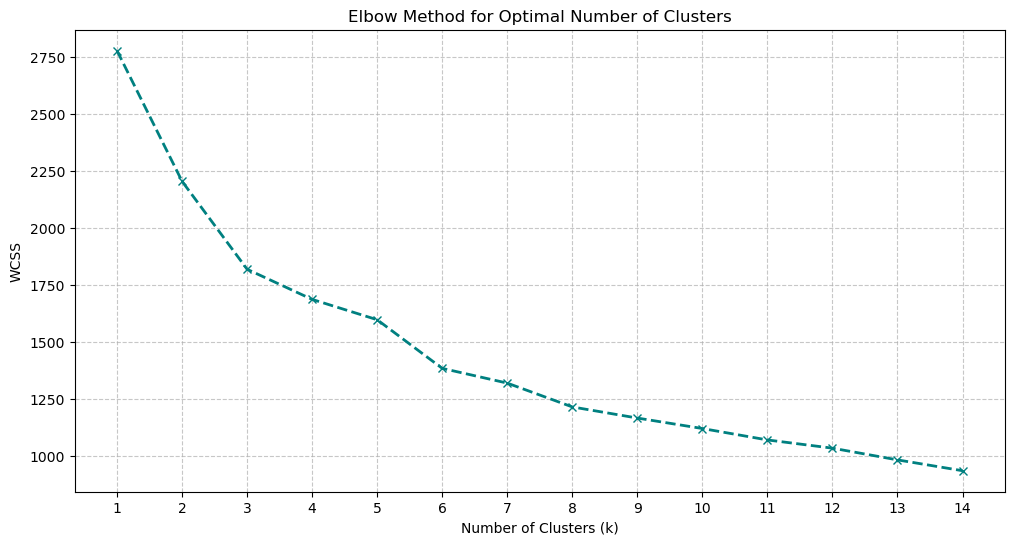

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Data for clustering
data_model = transformed_data

# Initialize a list to store WCSS values
wcss = []

# Compute WCSS for different numbers of clusters
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)  # Fixed random_state for reproducibility
    kmeans.fit(data_model)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), wcss, marker='x', linestyle='--', color='teal', linewidth=2)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1, 15))
plt.show()


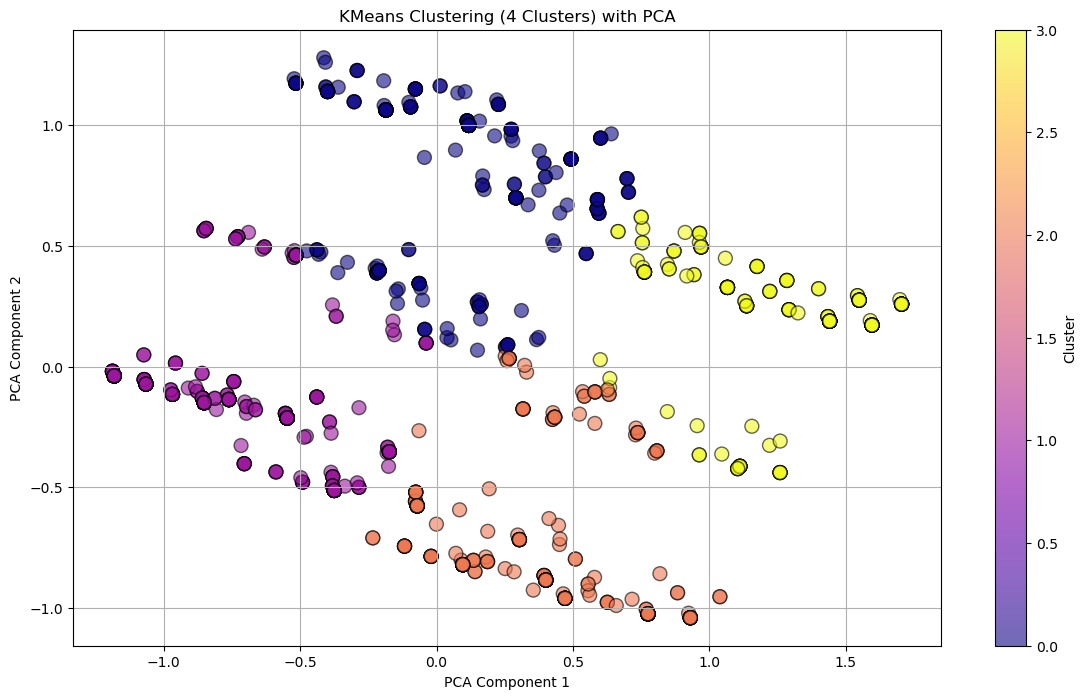

In [12]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_model)

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=4, random_state=42)  # Specifying number of clusters to 4
data_predict = kmeans.fit_predict(data_pca)

# Add cluster labels to the PCA-reduced data for plotting
pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = data_predict

# Plotting the clusters
plt.figure(figsize=(14, 8))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], s=100, cmap='plasma', edgecolor='k', alpha=0.6)  # Changed cmap to 'plasma'
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("KMeans Clustering (4 Clusters) with PCA")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


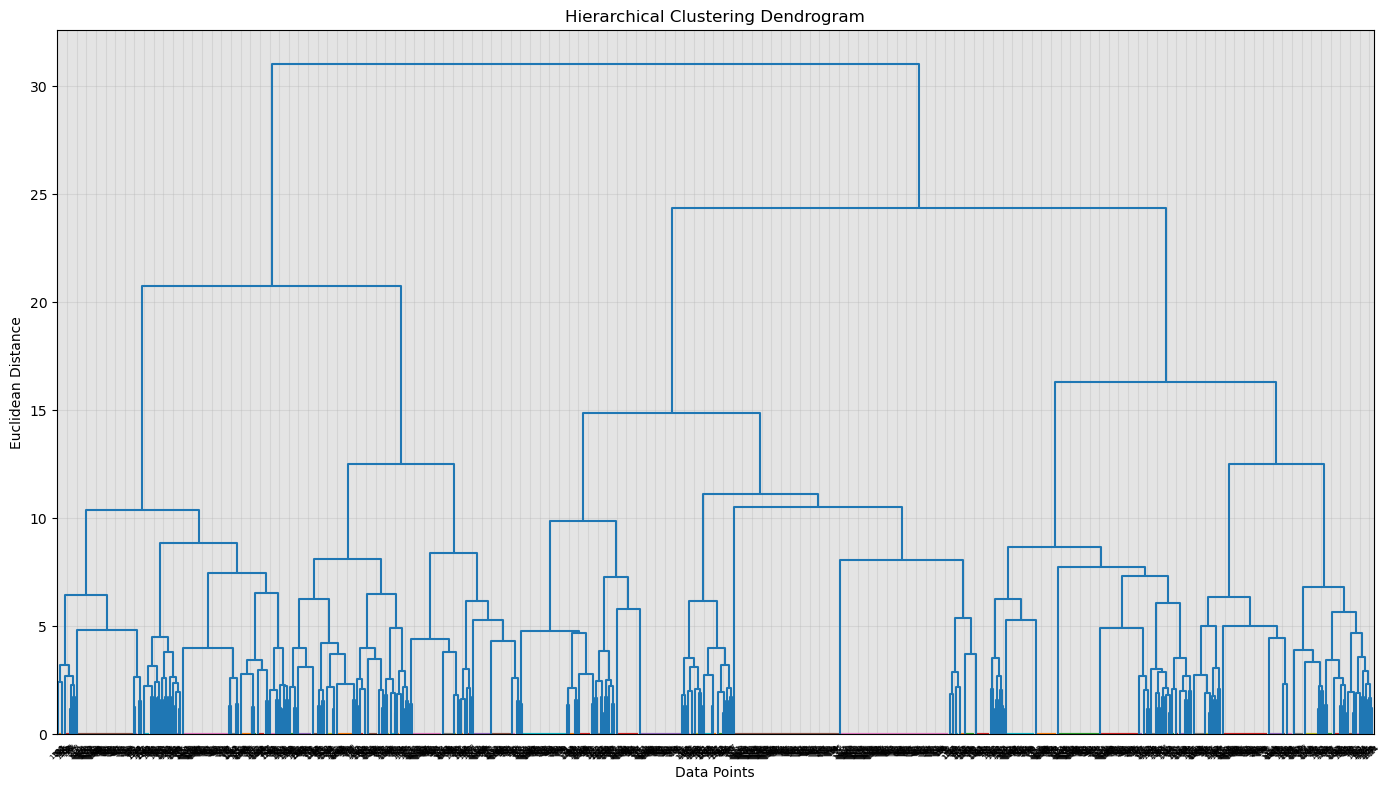

In [13]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Perform hierarchical clustering
merg = linkage(data_model, method='ward')

# Plot the dendrogram
plt.figure(figsize=(14, 8))
dendrogram(merg, leaf_rotation=90, color_threshold=0.7) 
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.xticks(rotation=45)  # Rotated x-ticks for better readability
plt.title("Hierarchical Clustering Dendrogram")
plt.grid(True, linestyle='-', alpha=0.3)  
plt.tight_layout()
plt.show()


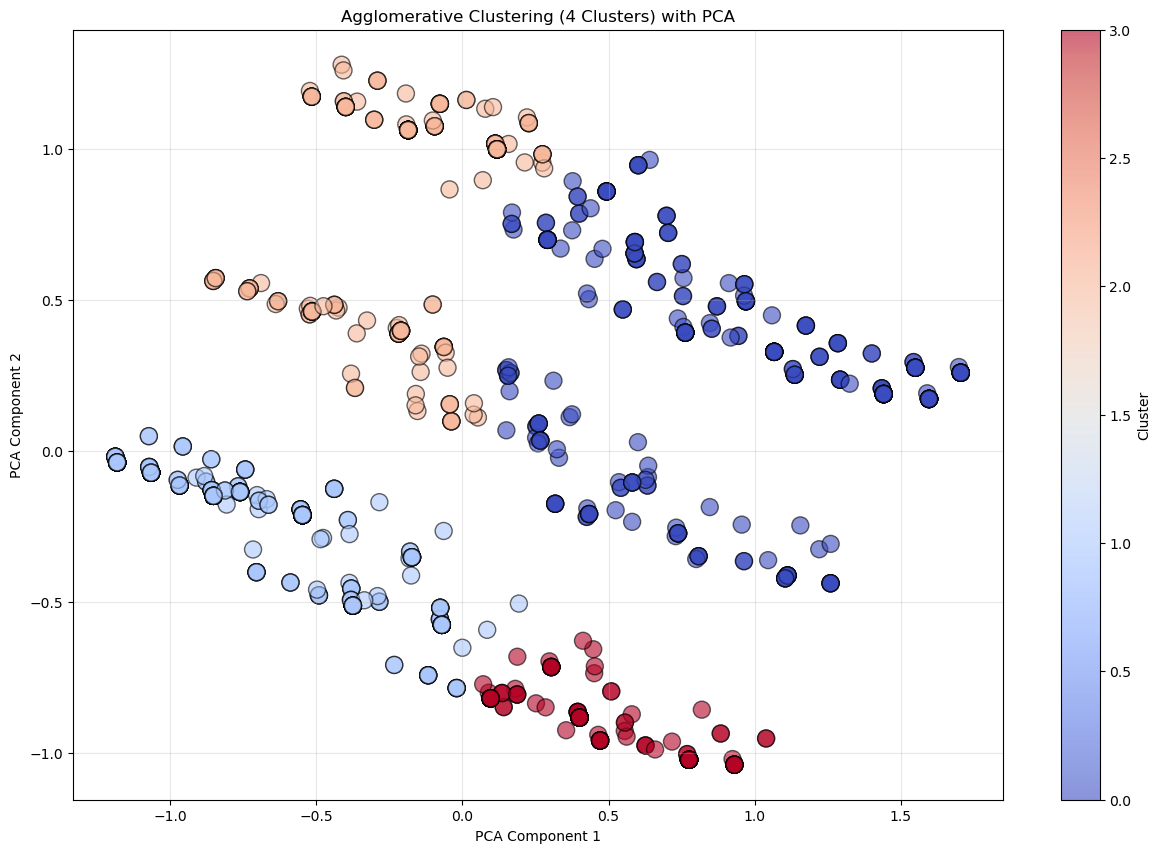

In [14]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import pandas as pd

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_model)

# Create and fit the Agglomerative Clustering model
hierarchical_cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')  # Remove 'affinity'
data_predict = hierarchical_cluster.fit_predict(data_pca)

# Add cluster labels to the PCA-reduced data for plotting
pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = data_predict

# Plotting the clusters
plt.figure(figsize=(15, 10))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], s=150, cmap='coolwarm', edgecolor='k', alpha=0.6)  # Changed cmap to 'coolwarm'
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Agglomerative Clustering (4 Clusters) with PCA")
plt.colorbar(label='Cluster')
plt.grid(True, linestyle='-', alpha=0.3)  # Added grid lines with soft appearance
plt.show()


Components: 2
BIC: -8758.617306486956
AIC: -9577.23208434035
ICL: -8760.617306486956
Components: 3
BIC: -22234.17354309004
AIC: -23464.736402701918
ICL: -22238.17354309004
Components: 4
BIC: -29901.261424357665
AIC: -31543.772365728022
ICL: -29907.261424357665
Components: 5
BIC: -32895.42871637849
AIC: -34949.88773950733
ICL: -32903.42871637849
Components: 6
BIC: -33544.65803981604
AIC: -36011.06514470336
ICL: -33554.65803981604
Components: 7
BIC: -30143.931765144876
AIC: -33022.28695179068
ICL: -30155.931765144876
Components: 8
BIC: -38785.69537206442
AIC: -42075.99864046871
ICL: -38799.69537206442


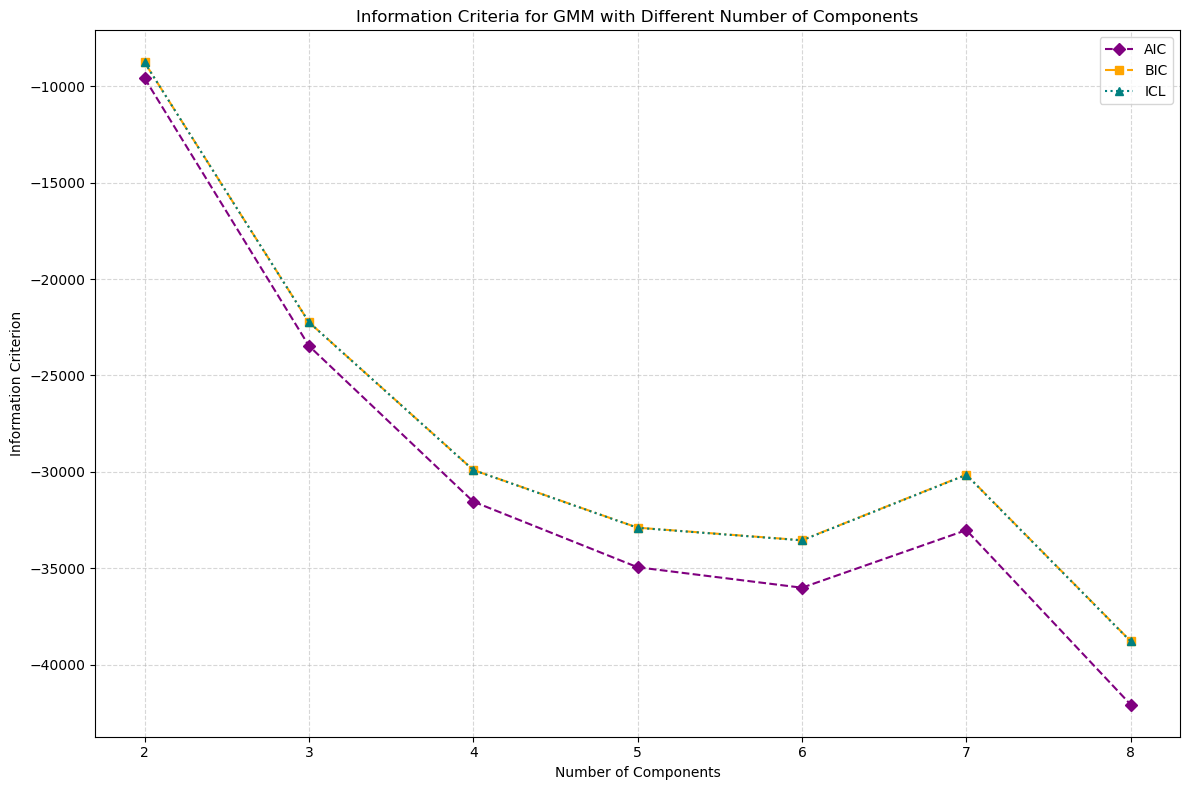

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Data
data_new = binary_matrix

# Fit Gaussian Mixture Models (GMM) for k=2 to 8
n_components_range = range(2, 9)
bic = []
aic = []
icl = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=1234)
    gmm.fit(data_new)

    bic_value = gmm.bic(data_new)
    aic_value = gmm.aic(data_new)

    bic.append(bic_value)
    aic.append(aic_value)

    icl_value = bic_value - 2 * (n_components - 1)
    icl.append(icl_value)

    print(f'Components: {n_components}')
    print(f'BIC: {bic_value}')
    print(f'AIC: {aic_value}')
    print(f'ICL: {icl_value}')

# Plot the BIC, AIC, and ICL values
plt.figure(figsize=(12, 8))
plt.plot(n_components_range, aic, marker='D', linestyle='--', label='AIC', color='purple')
plt.plot(n_components_range, bic, marker='s', linestyle='-.', label='BIC', color='orange')
plt.plot(n_components_range, icl, marker='^', linestyle=':', label='ICL', color='teal')

plt.xlabel("Number of Components")
plt.ylabel("Information Criterion")
plt.title("Information Criteria for GMM with Different Number of Components")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [16]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

# Assuming 'transformed_data' is your final processed numeric data
df_data = pd.DataFrame(transformed_data)  # Convert transformed data to a DataFrame

# Choose the optimal number of components/clusters
optimal_clusters = 4

# Fit Gaussian Mixture Model (GMM)
gmm_model = GaussianMixture(n_components=optimal_clusters, random_state=1234)
gmm_cluster_labels = gmm_model.fit_predict(df_data)

# Add GMM cluster labels to the DataFrame
df_data['GMM_Cluster'] = gmm_cluster_labels

# Fit KMeans with the same number of clusters
kmeans_model = KMeans(n_clusters=optimal_clusters, random_state=1234)
kmeans_cluster_labels = kmeans_model.fit_predict(transformed_data)

# Add KMeans cluster labels to the DataFrame
df_data['KMeans_Cluster'] = kmeans_cluster_labels

# Compare GMM and KMeans clusters using cross-tabulation
cluster_comparison = pd.crosstab(df_data['KMeans_Cluster'], df_data['GMM_Cluster'])
print(cluster_comparison)


GMM_Cluster       0    1    2    3
KMeans_Cluster                    
0               546    0    1   33
1                 0  213   11    4
2                46    3  265    8
3                29   38    0  256


In [17]:
df_data

,0,1,2,3,4,5,6,7,8,9,10,GMM_Cluster,KMeans_Cluster
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074,1,2
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440,3,3
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741,1,3
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034,0,0
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076,1,1
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671,0,0
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800,3,3
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316,0,0


In [18]:
df_data.rename(columns={i: name for i, name in enumerate(['yummy', 'tasty', 'cheap', 'fattening', 'convenient', 'fast', 'spicy', 'healthy', 'greasy', 'expensive', 'disgusting'])}, inplace=True)

In [19]:
df_data

,yummy,tasty,cheap,fattening,convenient,fast,spicy,healthy,greasy,expensive,disgusting,GMM_Cluster,KMeans_Cluster
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074,1,2
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440,3,3
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741,1,3
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034,0,0
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076,1,1
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671,0,0
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800,3,3
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316,0,0


In [20]:
df


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [22]:
df['Like.n'] = 6 - pd.to_numeric(df['Like'], errors='coerce')


In [23]:
from patsy import dmatrix

# List of independent variables
independent_vars = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

# Create a formula string for regression
formula = 'Like.n ~ ' + ' + '.join(independent_vars)

# Output the formula to ensure it's correctly formatted
print("Generated formula:", formula)


Generated formula: Like.n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


In [25]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assuming 'df' is your DataFrame and contains all required columns

# Convert categorical columns to numeric using LabelEncoder
categorical_cols = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Prepare the data
X = df[categorical_cols].astype(float)  # Convert to float
y = df['Like.n'].astype(float)  # Convert target variable to float

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit Gaussian Mixture Model (GMM) to identify clusters
gmm = GaussianMixture(n_components=2, random_state=1234)
gmm_labels = gmm.fit_predict(X_scaled)

# Add GMM cluster labels to the data
df['GMM_Cluster'] = gmm_labels

# Fit Linear Regression for each cluster
models = {}
for cluster in np.unique(gmm_labels):
    cluster_data = df[df['GMM_Cluster'] == cluster]
    X_cluster = cluster_data[categorical_cols]
    y_cluster = cluster_data['Like.n']

    # Standardize the cluster data
    X_cluster_scaled = scaler.transform(X_cluster)
    y_cluster = y_cluster.fillna(y_cluster.mean())

    model = LinearRegression()
    model.fit(X_cluster_scaled, y_cluster)
    models[cluster] = model

# Assess the models
for cluster, model in models.items():
    print(f"Cluster {cluster} Coefficients:")
    print(f"Intercept: {model.intercept_}")
    print(f"Coefficients: {model.coef_}")
    print()


Cluster 0 Coefficients:
Intercept: 5.026244421377372
Coefficients: [-7.69687328e-01  7.94316311e-02  9.44547822e-02  6.93889390e-18
  1.36527109e-01  5.49471746e-02 -2.09672197e-02 -4.07091973e-01
 -1.68059829e-02  1.37463901e-02  2.39623476e-01]

Cluster 1 Coefficients:
Intercept: 3.6482725618898932
Coefficients: [-0.42305333  0.02794116  0.01408755 -0.49259448  0.34925978 -0.00723282
  0.25747532 -0.67125448  0.22005196 -0.1549672   0.00289221]



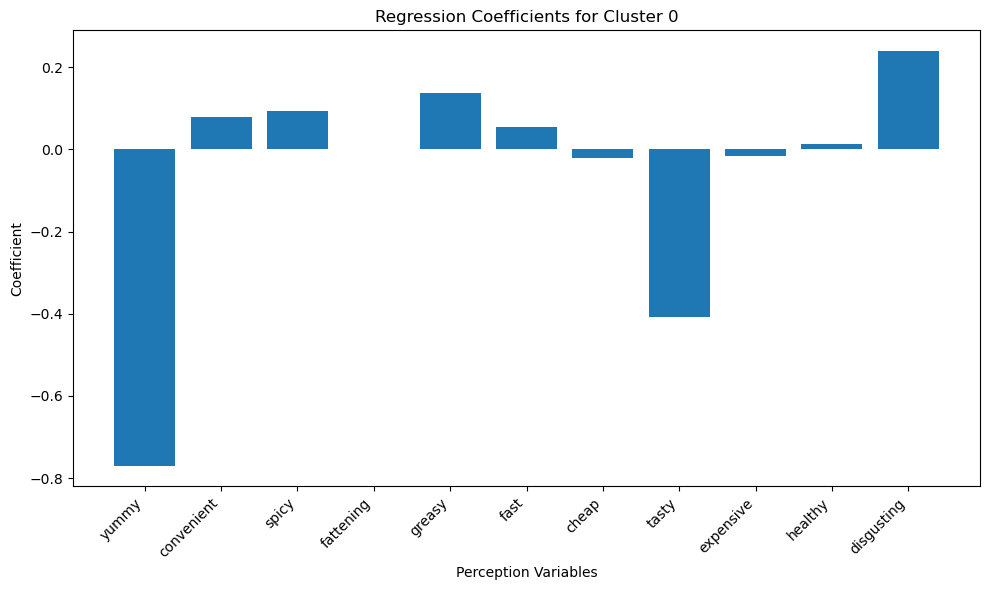

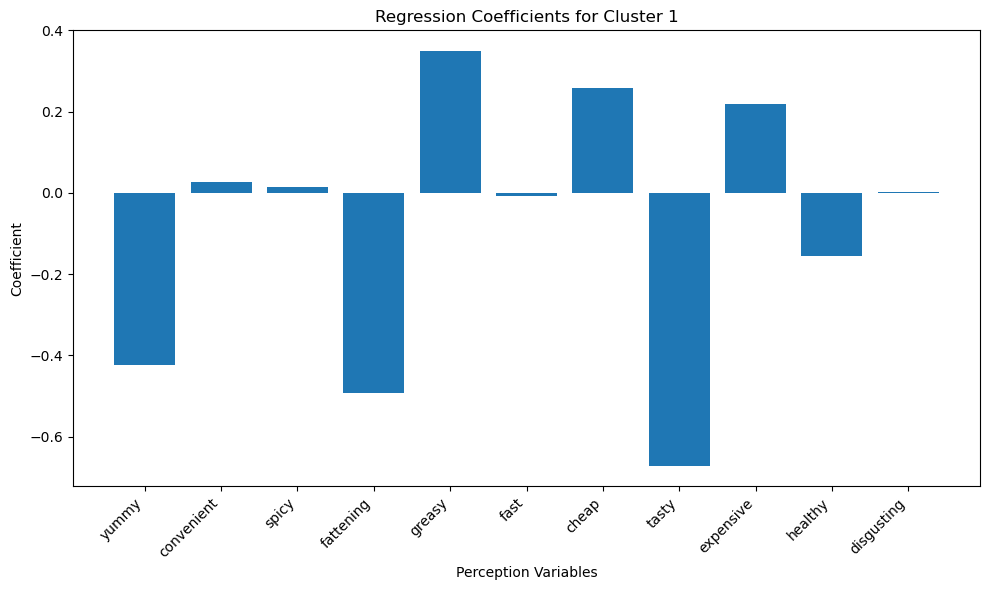

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data for plotting
def plot_regression_coefficients(model, independent_vars, cluster):
    coefs = model.coef_
    intercept = model.intercept_

    plt.figure(figsize=(10, 6))
    plt.bar(independent_vars, coefs)
    plt.xlabel('Perception Variables')
    plt.ylabel('Coefficient')
    plt.title(f'Regression Coefficients for Cluster {cluster}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot coefficients for each cluster
for cluster, model in models.items():
    plot_regression_coefficients(model, categorical_cols, cluster)


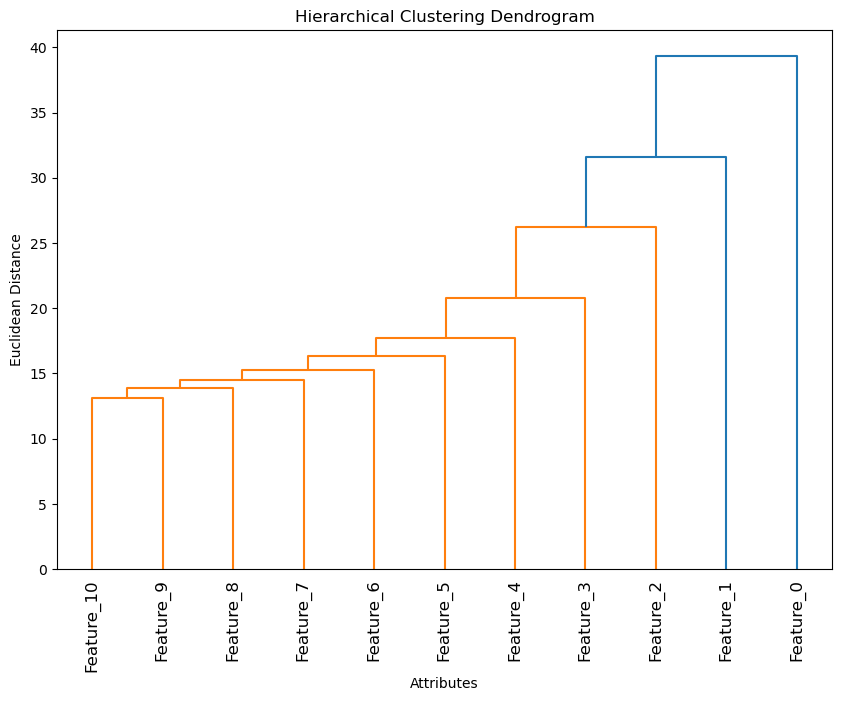

In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# Convert transformed_data to DataFrame if it's a NumPy array
if isinstance(transformed_data, np.ndarray):
    # Assume original column names are available or create dummy names
    column_names = [f'Feature_{i}' for i in range(transformed_data.shape[1])]
    transformed_data = pd.DataFrame(transformed_data, columns=column_names)

# Calculate the distance matrix on the transpose of transformed_data
distance_matrix = pdist(transformed_data.T, metric='euclidean')

# Perform hierarchical clustering
Z = linkage(distance_matrix, method='ward')

# Get the order of the attributes
ordered_indices = dendrogram(Z, no_plot=True)['leaves']

# Reorder the columns in transformed_data based on the clustering results
transformed_data_reordered = transformed_data.iloc[:, ordered_indices]

# Optional: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=transformed_data.columns, orientation='top', distance_sort='descending')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Attributes')
plt.ylabel('Euclidean Distance')
plt.xticks(rotation=90)
plt.show()
